In [1]:
from lionagi.core.messages import Instruction, System
from lionagi.core.schema.structure import Structure
from lionagi.core.agent.base_agent import BaseAgent
from lionagi.core.branch.executable_branch import ExecutableBranch

In [2]:
from lionagi.core.tool.tool_manager import func_to_tool
from lionagi.core.schema.action_node import ActionSelection

In [3]:
def multiply(number1: float, number2: float):
    """
    Perform multiplication on two numbers.

    Args:
        number1: First number to multiply.
        number2: Second number to multiply.

    Returns:
        The product of number1 and number2.

    """
    return number1 * number2


tool_m = func_to_tool(multiply)

In [4]:
action = ActionSelection(
    action="ReAct", action_kwargs={"auto": True}
)  # action: any availble flow functions, default to 'chat'

In [5]:
sys_mul = System(
    system="you are asked to perform as a function picker and parameter provider"
)
instruction = Instruction(
    instruction="Think step by step, understand the following basic math question and provide parameters for function calling."
)

In [6]:
question1 = "A school is ordering laptops for its students. If each classroom has 25 students and the school wants to provide a laptop for each student in its 8 classrooms, how many laptops in total does the school need to order?"
question2 = "A bakery sells cupcakes in boxes of 6. If a customer wants to buy enough cupcakes for a party of 48 people, with each person getting one cupcake, how many boxes of cupcakes does the customer need to buy?"

import json

context = {"Question1": question1, "question2": question2}
context = json.dumps(context)

In [7]:
struct_mul = Structure()
struct_mul.add_node(sys_mul)
struct_mul.add_node(instruction)
struct_mul.add_node(tool_m[0])
struct_mul.add_node(action)
struct_mul.add_relationship(sys_mul, instruction)
struct_mul.add_relationship(instruction, tool_m[0])
struct_mul.add_relationship(instruction, action)

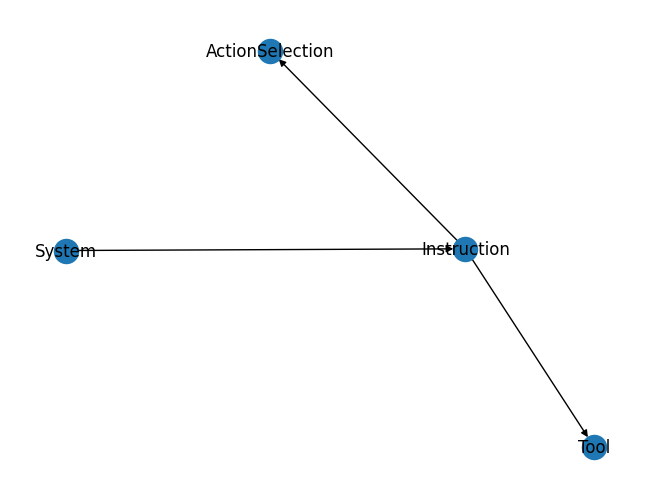

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

g = struct_mul.graph.to_networkx()
labels = nx.get_node_attributes(g, "class_name")
nx.draw(g, labels=labels)

In [9]:
## output_parser_func parameter: agent self
def multiply_output_parser(agent):
    return agent.executable.responses


executable = ExecutableBranch()

In [10]:
calc = BaseAgent(
    structure=struct_mul,
    executable_obj=executable,
    output_parser=multiply_output_parser,
)

In [11]:
result = await calc.execute(context=context)

------------------Welcome: system--------------------


system: you are asked to perform as a function picker and parameter provider

user: Think step by step, understand the following basic math question and provide parameters for function calling.

assistant: None

-----------------------------------------------------


In [12]:
for i in calc.executable.branch.messages["content"]:
    print(i)

{"system_info": "you are asked to perform as a function picker and parameter provider"}
{"instruction": {"Notice": "\nyou have 2 step left in current task. if available, integrate previous tool responses. perform reasoning and prepare action plan according to available tools only, apply divide and conquer technique.\n", "Task": "Think step by step, understand the following basic math question and provide parameters for function calling."}, "context": "{\"Question1\": \"A school is ordering laptops for its students. If each classroom has 25 students and the school wants to provide a laptop for each student in its 8 classrooms, how many laptops in total does the school need to order?\", \"question2\": \"A bakery sells cupcakes in boxes of 6. If a customer wants to buy enough cupcakes for a party of 48 people, with each person getting one cupcake, how many boxes of cupcakes does the customer need to buy?\"}"}
{"response": "To address the given task, we need to solve two basic math problem

In [13]:
calc.executable.branch.messages

,node_id,timestamp,role,sender,recipient,content
0,8b7afd37c865c7f78480313c9e975062,2024_03_21T15_08_27_203139+00_00,system,system,assistant,"{""system_info"": ""you are asked to perform as a..."
1,33db336a7392c8c34be074fdd4c65d34,2024_03_21T15_08_28_094021+00_00,user,user,assistant,"{""instruction"": {""Notice"": ""\nyou have 2 step ..."
2,04d9b5cf4d4489b820e05acefb421f0d,2024_03_21T15_09_04_307288+00_00,assistant,assistant,user,"{""response"": ""To address the given task, we ne..."
3,241373b2edfb6f23290bae18f9898ca6,2024_03_21T15_09_04_310007+00_00,user,user,assistant,"{""instruction"": ""\nyou have 1 step left in cur..."
4,1feb190bfd2ec81cde767f42eb987290,2024_03_21T15_09_07_761085+00_00,assistant,action_request,action,"{""action_request"": [{""action"": ""action_multipl..."
5,a8816241d62bcdba87da88275dfc6f70,2024_03_21T15_09_07_763517+00_00,assistant,action_response,assistant,"{""action_response"": {""function"": ""multiply"", ""..."
6,b78ad1f1e1d2aef2abd8d125266550df,2024_03_21T15_09_07_764525+00_00,assistant,action_response,assistant,"{""action_response"": {""function"": ""multiply"", ""..."
